In [1]:
import gzip
import struct
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def visualize_image(img):
    """
    img: list with len = 784
    An example image of MNIST dataset either train or test
    """
    # Convert to numpy array
    img = np.array(img)
    # Reshape to 28x28 image to plot using matplotlib
    img = img.reshape(28,28)
    plt.imshow(img)

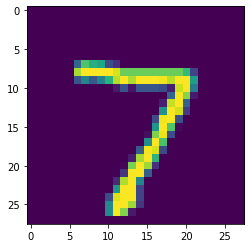

In [4]:
# trying reading binary (rb) mode
# ubyte is unsigned byte
# idx3 means dimensions like n1xn2xn3; for MNIST train its 60,000 x 28 x 28
# MNIST test is 10,000 x 28 x 28, we will convert this into 10,000 x 784

path = 'data/t10k-images-idx3-ubyte.gz'
with gzip.open(path,'rb') as f:
    data = f.read() # returns a bytes object

#### Format of the test images file
# Train SET IMAGE FILE (train-images-idx3-ubyte):
# |[offset] | [type]     |     [value]     |     [description]
# 0000     32 bit integer  0x00000803(2051) magic number
# 0004     32 bit integer  10000            number of images
# 0008     32 bit integer  28               number of rows
# 0012     32 bit integer  28               number of columns
# 0016     unsigned byte   ??               pixel
# 0017     unsigned byte   ??               pixel
# ........
# xxxx     unsigned byte   ??               pixel

# For reading first 16 bytes, containing 4 bytes for magic number, 4 for #images, 4 for #rows and 4 for #cols 
meta_data = struct.iter_unpack('>I',data[0:16])

magic_number = next(meta_data)
n_images= next(meta_data)
n_rows = next(meta_data)
n_cols = next(meta_data)

magic_number, n_images, n_rows, n_cols

pixels = list(struct.iter_unpack('>B',data[16:]))

len(list(pixels)) # 10000 x 784

images = []
n_pixels = n_rows[0] * n_cols[0]
for i in range(n_images[0]):
    images.append(pixels[i * n_pixels: i * n_pixels + n_pixels])

assert len(images)==10000, "Make sure there are 10,000 images in the test set"

visualize_image(images[0])

In [27]:
# trying reading binary (rb) mode
# ubyte is unsigned byte
# idx3 means dimensions like n1xn2xn3; for MNIST train its 60,000 x 28 x 28
# MNIST test is 10,000 x 28 x 28, we will convert this into 10,000 x 784

path = 'data/train-images-idx3-ubyte.gz'
with gzip.open(path,'rb') as f:
    data = f.read() # returns a bytes object

In [30]:
meta_data = struct.iter_unpack('>I',data[0:16])
magic_number, n_images, n_rows, n_cols = meta_data

In [31]:
magic_number,n_images,n_rows,n_cols

((2051,), (60000,), (28,), (28,))

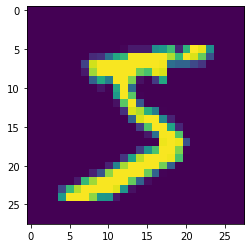

In [5]:
#### Format of the test images file
# Train SET IMAGE FILE (train-images-idx3-ubyte):
# |[offset] | [type]     |     [value]     |     [description]
# 0000     32 bit integer  0x00000803(2051) magic number
# 0004     32 bit integer  10000            number of images
# 0008     32 bit integer  28               number of rows
# 0012     32 bit integer  28               number of columns
# 0016     unsigned byte   ??               pixel
# 0017     unsigned byte   ??               pixel
# ........
# xxxx     unsigned byte   ??               pixel

# For reading first 16 bytes, containing 4 bytes for magic number, 4 for #images, 4 for #rows and 4 for #cols 
meta_data = struct.iter_unpack('>I',data[0:16])

magic_number = next(meta_data)
n_images= next(meta_data)
n_rows = next(meta_data)
n_cols = next(meta_data)

magic_number, n_images, n_rows, n_cols

pixels = list(struct.iter_unpack('>B',data[16:]))

len(list(pixels)) # 10000 x 784

images = []
n_pixels = n_rows[0] * n_cols[0]
for i in range(n_images[0]):
    images.append(pixels[i * n_pixels: i * n_pixels + n_pixels])

assert len(images)==60000, "Make sure there are 10,000 images in the test set"

visualize_image(images[0])

In [22]:
# trying reading binary (rb) mode
# ubyte is unsigned byte
# idx3 means dimensions like n1xn2xn3; for MNIST train its 60,000 x 28 x 28
# MNIST test is 10,000 x 28 x 28, we will convert this into 10,000 x 784

path = 'data/train-labels-idx1-ubyte.gz'
with gzip.open(path,'rb') as f:
    data = f.read() # returns a bytes object

#### Format of the test images file
# Train SET label FILE (train-labels-idx1-ubyte):
# [offset] [type]          [value]          [description]
# 0000     32 bit integer  0x00000801(2049) magic number (MSB first)
# 0004     32 bit integer  10000            number of items
# 0008     unsigned byte   ??               label
# 0009     unsigned byte   ??               label
# ........
# xxxx     unsigned byte   ??               label
# The labels values are 0 to 9.

# For reading first 16 bytes, containing 4 bytes for magic number, 4 for #images, 4 for #rows and 4 for #cols 
meta_data = struct.iter_unpack('>I',data[0:8])

magic_number = next(meta_data)
n_labels = next(meta_data)


train_labels = [label[0] for label in struct.iter_unpack('>B',data[8:])]

assert len(train_labels)==n_labels[0], f"Make sure there are {n_labels} labels in the test set, you currently have {len(train_labels)}"

In [26]:
# trying reading binary (rb) mode
# ubyte is unsigned byte
# idx1 means dimensions like n1; for MNIST train its 60,000 for train
# MNIST test is 10,000 x 1

path = 'data/t10k-labels-idx1-ubyte.gz'
with gzip.open(path,'rb') as f:
    data = f.read() # returns a bytes object

#### Format of the test images file
# Test SET label FILE (test-labels-idx1-ubyte):
# [offset] [type]          [value]          [description]
# 0000     32 bit integer  0x00000801(2049) magic number (MSB first)
# 0004     32 bit integer  10000            number of items
# 0008     unsigned byte   ??               label
# 0009     unsigned byte   ??               label
# ........
# xxxx     unsigned byte   ??               label
# The labels values are 0 to 9.

# For reading first 16 bytes, containing 4 bytes for magic number, 4 for #images, 4 for #rows and 4 for #cols 
meta_data = struct.iter_unpack('>I',data[0:8])

magic_number = next(meta_data)
n_labels = next(meta_data)


test_labels = [label[0] for label in struct.iter_unpack('>B',data[8:])]

assert len(test_labels)==n_labels[0], f"Make sure there are {n_labels} labels in the test set, you currently have {len(train_labels)}"

In [2]:
def parse_images(image_filename:str)->list:
    print(f"Working on {image_filename}")
    with gzip.open(image_filename,'rb') as f:
        data = f.read() # returns a bytes object

    #### Format of the test images file
    # Train/Test SET IMAGE FILE (train[t10k]-images-idx3-ubyte):
    # |[offset] | [type]     |     [value]     |     [description]
    # 0000     32 bit integer  0x00000803(2051) magic number
    # 0004     32 bit integer  60000(10000)     number of train(test)images
    # 0008     32 bit integer  28               number of rows
    # 0012     32 bit integer  28               number of columns
    # 0016     unsigned byte   ??               pixel
    # 0017     unsigned byte   ??               pixel
    # ........
    # xxxx     unsigned byte   ??               pixel

    # For reading first 16 bytes, containing 4 bytes for magic number, 4 for #images, 4 for #rows and 4 for #cols 
    meta_data = struct.iter_unpack('>I',data[0:16])

    magic_number, n_images, n_rows, n_cols  = meta_data

    pixels = [pix[0] for pix in struct.iter_unpack('>B',data[16:])]

    images = []
    n_pixels = n_rows[0] * n_cols[0]
    n_images = n_images[0]
    assert len(list(pixels))==n_images*n_pixels # 60000(10000) x 784
    
    for i in range(n_images):
        images.append(pixels[i * n_pixels: i * n_pixels + n_pixels])

    return images

In [3]:
def parse_labels(label_filename:str)->list:
    print(f"Working on {label_filename}")
    with gzip.open(label_filename,'rb') as f:
        data = f.read() # returns a bytes object

    #### Format of the test images file
    # Train/test SET label FILE (train(t10k)-labels-idx1-ubyte):
    # [offset] [type]          [value]          [description]
    # 0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    # 0004     32 bit integer  60000(10000)     number of items
    # 0008     unsigned byte   ??               label
    # 0009     unsigned byte   ??               label
    # ........
    # xxxx     unsigned byte   ??               label
    # The labels values are 0 to 9.

    # For reading first 8 bytes, containing 4 bytes for magic number, 4 for #labels
    meta_data = struct.iter_unpack('>I',data[0:8])

    magic_number = next(meta_data)
    n_labels = next(meta_data)

    labels = [label[0] for label in struct.iter_unpack('>B',data[8:])]

    assert len(labels)==n_labels[0], f"Make sure there are {n_labels} labels in the test set,\
                                       you currently have {len(labels)}"

    return labels

In [4]:
def parse_mnist(image_filename, label_filename):
    """ Read an images and labels file in MNIST format.  See this page:
    http://yann.lecun.com/exdb/mnist/ for a description of the file format.

    Args:
        image_filename (str): name of gzipped images file in MNIST format
        label_filename (str): name of gzipped labels file in MNIST format

    Returns:
        Tuple (X,y):
            X (numpy.ndarray[np.float32]): 2D numpy array containing the loaded
                data.  The dimensionality of the data should be
                (num_examples x input_dim) where 'input_dim' is the full
                dimension of the data, e.g., since MNIST images are 28x28, it
                will be 784.  Values should be of type np.float32, and the data
                should be normalized to have a minimum value of 0.0 and a
                maximum value of 1.0.

            y (numpy.ndarray[dypte=np.uint8]): 1D numpy array containing the
                labels of the examples.  Values should be of type np.uint8 and
                for MNIST will contain the values 0-9.
    """
    ### BEGIN YOUR CODE
    if  "train" in image_filename:
        assert "train-labels" in label_filename, "Please pass labels for train images only."
        images = parse_images(image_filename)
        labels = parse_labels(label_filename)
        train_images = np.array(images, dtype=np.float32)
        # normalize the images between 0 and 1
        #train_images = train_images/np.linalg.norm(train_images)
        train_labels = np.array(labels, dtype=np.uint8)
        return (train_images, train_labels)
    
    if  "test" in image_filename:
        assert "t10k-labels" in label_filename, "Please pass labels for test images only."
        images = parse_images(image_filename)
        labels = parse_labels(label_filename)
        #test_images = np.array(images, dtype=np.float32)
        # normalize the images between 0 and 1
        test_images = test_images/np.linalg.norm(test_images)
        test_labels = np.array(labels, dtype=np.uint8)
        return (test_images, test_labels)

In [5]:
X, y = parse_mnist("data/train-images-idx3-ubyte.gz",
            "data/train-labels-idx1-ubyte.gz")

Working on data/train-images-idx3-ubyte.gz
Working on data/train-labels-idx1-ubyte.gz


In [6]:
X.shape, y.shape

((60000, 784), (60000,))

In [7]:
np.linalg.norm(X[:10])

7112.482

In [8]:
np.linalg.norm(y[:10])

12.409673645990857

In [9]:
y[:10] #[5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)